# Visualzing Differences Between Groups 

In data science, we often want to determine if some feature is the same or different between two groups.  Let's see what we can learn about patterns in data science salaries.

In [54]:
import pandas as pd

df = pd.read_csv('assets/ds_salaries.csv')
df.head()

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Do data scientist salaries change depending on if they are working at small, medium or large comanies?


In [55]:

print('The mean data science salary by company size is: ')
print(df.groupby('company_size')['salary_in_usd'].mean())
print('The median data science salary by company size is: ')
print(df.groupby('company_size')['salary_in_usd'].median())



The mean data science salary by company size is: 
company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64
The median data science salary by company size is: 
company_size
L    108500.0
M    140000.0
S     62146.0
Name: salary_in_usd, dtype: float64


# Seaborn
Seaborn is a Python data visualization library based on `matplotlib` (which we have used a little bit before). It provides a higher-level interface for drawing attractive and informative statistical graphics. Here's a brief history and overview:

**Origin**: Seaborn was created by Michael Waskom, who started the project during his graduate studies. The library was intended to make visualizations that are directly related to statistical analyses more accessible and to improve upon some of the default aesthetics provided by `matplotlib`.

**Name Origin**: The name "Seaborn" is actually a reference to a character named Sam Seaborn from the television show "The West Wing". Michael Waskom, the creator, has confirmed this in discussions online.

**Aesthetics and Themes**: One of the first things users notice about Seaborn is its capability to produce visually pleasing plots with just default settings. Seaborn comes with several themes and color palettes that are designed to reveal patterns in data in a manner that's visually appealing and easily interpretable.

**Functionalities**: Over the years, Seaborn has introduced many functionalities that simplify complex visualization tasks. Some popular plot types and features in Seaborn include:
* `relplot`: Relational plots for visualizing statistical relationships between variables.
* `catplot`: Categorical plots for visualizing categorical data distributions.
* `distplot`/`histplot`: For visualizing the distribution of dataset.
* `heatmap`: For visualizing matrix-like data.
* `pairplot`: To plot pairwise relationships in a dataset.
* Integrated functions to work with `pandas` DataFrames.


## Comparing histograms

We've looked at the histogram of a single feature before using the Pandas built-in plotting functions, but let's see how we do it using Seaborn with the `histplot` method.  Below we'll visualize the distribution of the age of all passengers on the Titanic.

By convention, we import `seaborn` as `sns`.  We'll also import `matplotlib.pyplot` for use later.

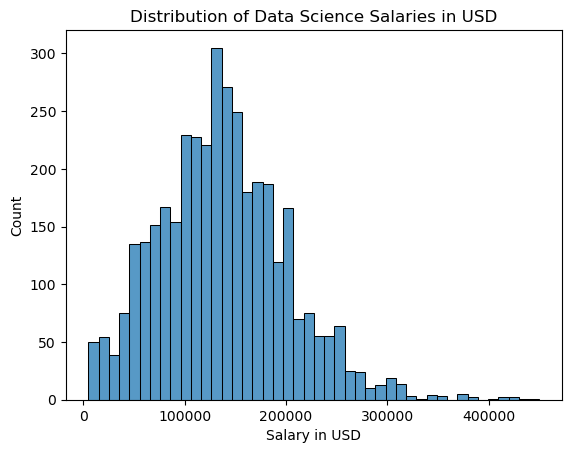

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['salary_in_usd'])
plt.title("Distribution of Data Science Salaries in USD")
plt.xlabel('Salary in USD')
plt.show()

Let's see how this changes depending on what size company the person was employed at.

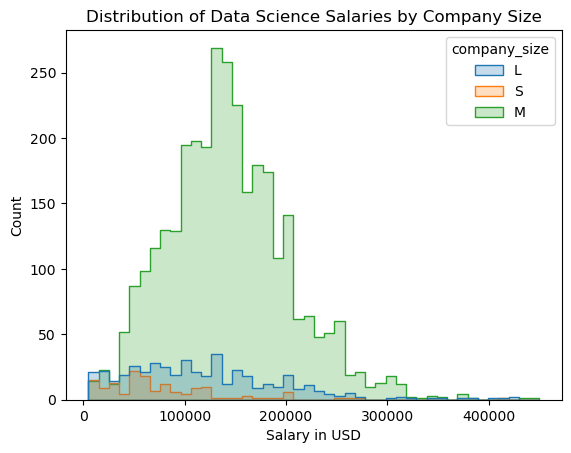

In [57]:

# Create overlaid histograms.  Element = 'step' makes it easier to see the overlaid plots
sns.histplot(x='salary_in_usd', element="step", hue="company_size", data=df)

plt.title('Distribution of Data Science Salaries by Company Size')
plt.xlabel('Salary in USD')
plt.show()


What can we say about differences in salaries by company size?

## Comparing box plots

A different figure we can use to compare the distribution of two or more groups, which you may or may not have seen in the past, is called a box plot.

Box plots (originally called box and whisker plots) were developed by John Tukey, an influential American mathematician and statistician known for his significant contributions to various areas within the field of statistics and beyond

Box plots make it easy for us to visualize and compare 6 different aspects of the distribution of a feature: the minimum, the 25th percentile, the median, the 75th percentile, the range, and the middle 50th percentile.  

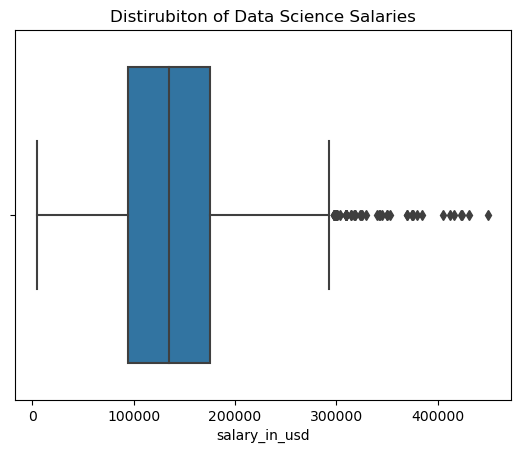

In [58]:
# Create the boxplot
sns.boxplot(x='salary_in_usd', data=df)

# We need to use Matplotlib to add a title
plt.title('Distirubiton of Data Science Salaries')

# Display the plot
plt.show()


The vertical lines on the box plot indicate the values of the minimum, the 25th percentile, the median, the 75th percentile and the max.

Estimating visually, we can see min = 0, 25th percentile = 20, median = 28ish, 75th percentile, = 38ish, and the maximum value is around 80.  We can calculate these values (which are also known as the 5-number summary) exactly using the `.describe()` method.  Note that the median is the same as the 50th percentile.

In [59]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

Now let's compare the box plots of salary by company size.

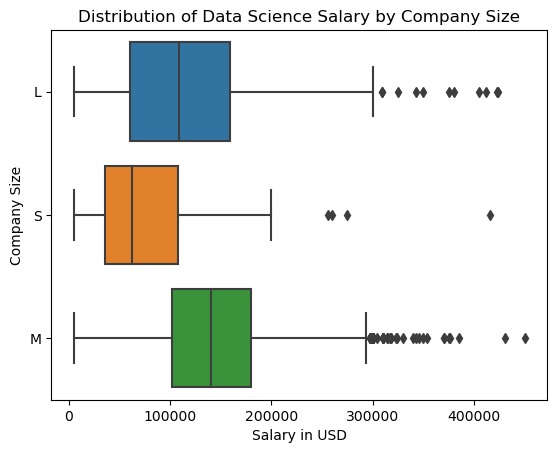

In [60]:

sns.boxplot(x='salary_in_usd', y='company_size', data=df)

plt.title('Distribution of Data Science Salary by Company Size')
plt.xlabel('Salary in USD')
plt.ylabel('Company Size')

# Display the plot
plt.show()

What can we say about data science salaries from looking at the boxplots?

What are aspects of the distributions that are easier to see from the boxplots than the histograms?  And vice versa?

## How do data science salaries change by experience level?

Note

EN > Entry-level / Junior
MI> Mid-level / Intermediate
SE > Senior-level / Expert
EX > Executive-level / Director

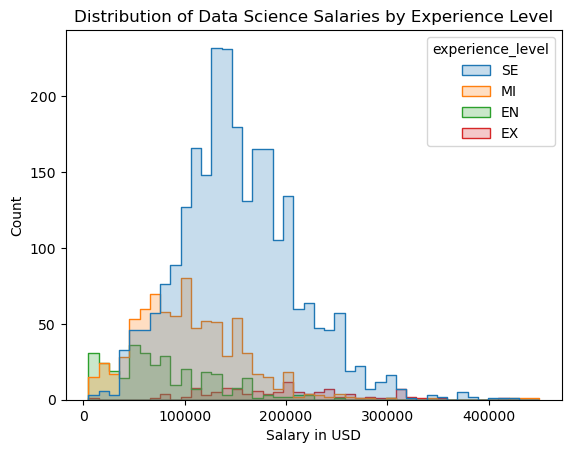

In [61]:
sns.histplot(x='salary_in_usd', element="step", hue="experience_level", data=df)

plt.title('Distribution of Data Science Salaries by Experience Level')
plt.xlabel('Salary in USD')
plt.show()


What could be better?

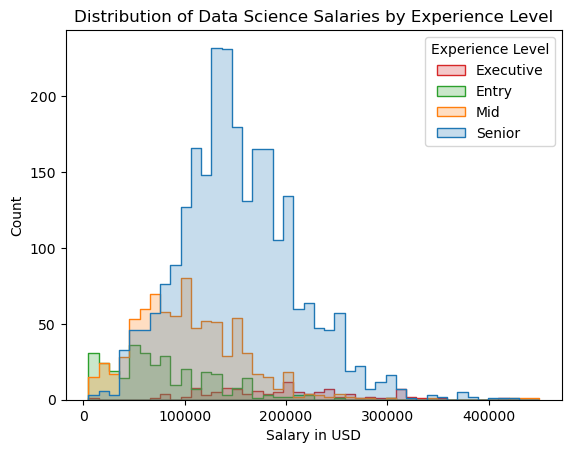

In [62]:
sns.histplot(x='salary_in_usd', element="step", hue="experience_level", data=df)

plt.title('Distribution of Data Science Salaries by Experience Level')
plt.xlabel('Salary in USD')

custom_labels=['Executive', 'Entry', 'Mid','Senior']

plt.legend(labels=custom_labels,title='Experience Level')

plt.show()

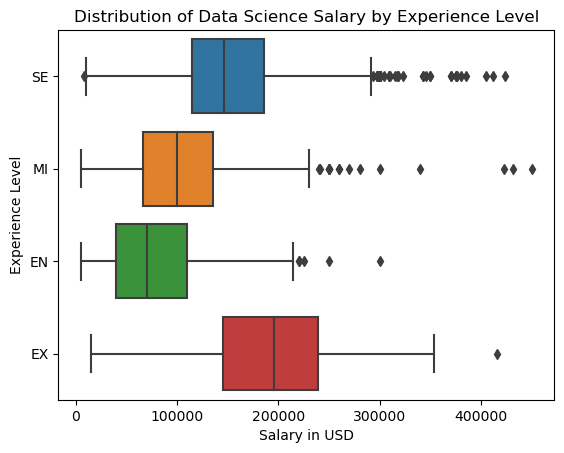

In [63]:
sns.boxplot(x='salary_in_usd', y='experience_level', data=df)

plt.title('Distribution of Data Science Salary by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')


# Display the plot
plt.show()

Let's improve the labeling of this figure, too.

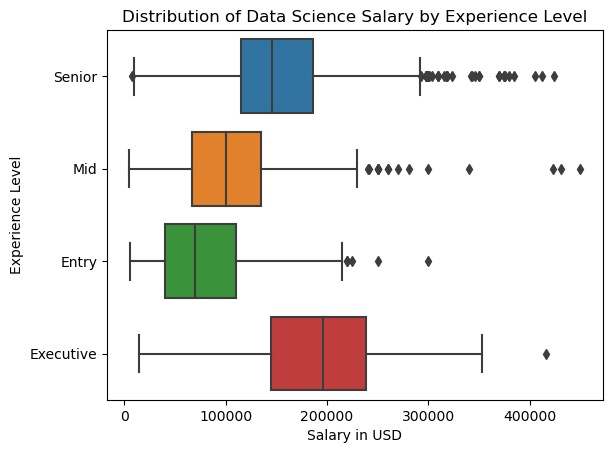

In [64]:
sns.boxplot(x='salary_in_usd', y='experience_level', data=df)

plt.title('Distribution of Data Science Salary by Experience Level')
plt.xlabel('Salary in USD')
plt.ylabel('Experience Level')
plt.yticks([0,1,2,3], ['Senior', 'Mid', 'Entry','Executive'])

# Display the plot
plt.show()

Now let's look at how salaries change by the percent of remote work (0, 50 or 100%)

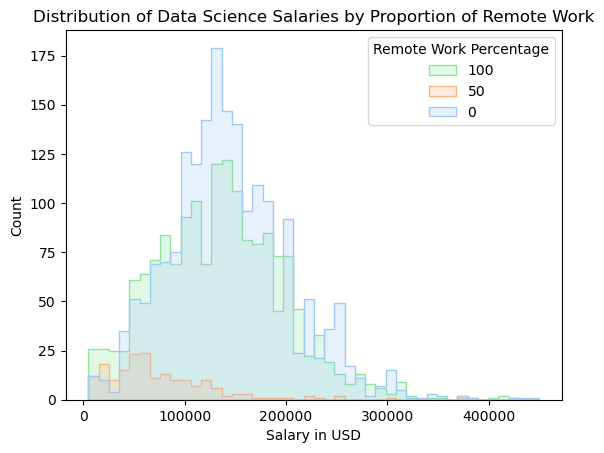

In [65]:
#Seaborn palettes ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

sns.histplot(x='salary_in_usd', element="step", hue="remote_ratio", data=df, palette='pastel')

custom_labels=['100', '50', '0']

plt.legend(labels=custom_labels,title='Remote Work Percentage')

plt.title('Distribution of Data Science Salaries by Proportion of Remote Work')
plt.xlabel('Salary in USD')
plt.show()


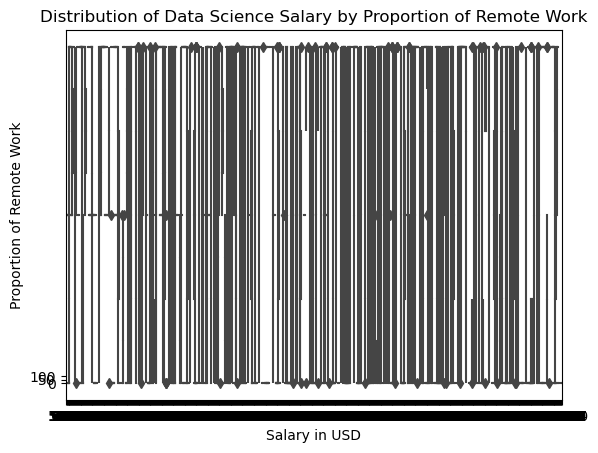

In [66]:
sns.boxplot(x='salary_in_usd', y='remote_ratio', data=df)

plt.title('Distribution of Data Science Salary by Proportion of Remote Work')
plt.xlabel('Salary in USD')
plt.ylabel('Proportion of Remote Work')
plt.yticks([0,1,2], ['0', '50', '100'])

# Display the plot
plt.show()

In [67]:
What happened?  What went wrong?

Object `wrong` not found.


In [68]:
df['remote_ratio'].dtype

dtype('int64')

We can make a histogram by remote_ratio when remote_ratio is a quantatitive measure, but this won't work to make a boxplot

In [73]:
df['remote_ratio'] = df['remote_ratio'].astype('category')

In [74]:
df['remote_ratio'].dtype

CategoricalDtype(categories=[0, 50, 100], ordered=False)

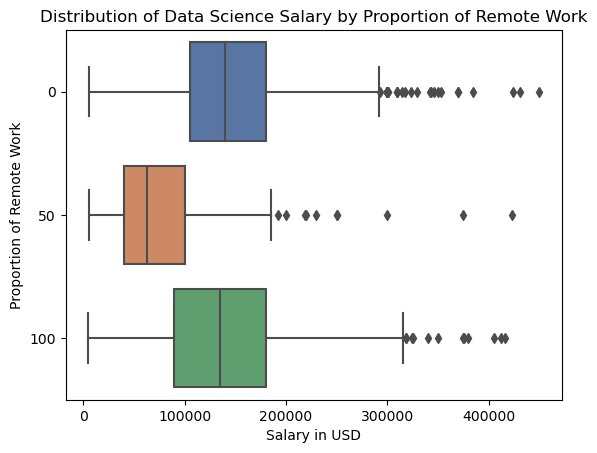

In [76]:
sns.boxplot(x='salary_in_usd', y='remote_ratio', data=df, palette='deep')

plt.title('Distribution of Data Science Salary by Proportion of Remote Work')
plt.xlabel('Salary in USD')
plt.ylabel('Proportion of Remote Work')
#plt.yticks([0,1,2], ['0', '50', '100'])

# Display the plot
plt.show()

## Box plots vs histograms

Box plots and histograms show similar but not identical information.  Here are some strengths and weaknesses of both.  

### Histogram:

**Mode:** A histogram can clearly show unimodal, bimodal, or multimodal distributions, which are distributions with one, two, or multiple peaks, respectively.

**Skewness:** The direction and degree of skewness (asymmetry) can be easily discerned from a histogram. You can visually determine if the distribution is skewed to the left (negatively skewed) or to the right (positively skewed).

**Gaps and Outliers:** While histograms aren’t the best for identifying individual outliers, they are excellent for spotting gaps in data or unusual spikes, which could suggest possible outliers or data collection issues.

**General Shape:** The overall shape of the distribution (bell-shaped, uniform, exponential, etc.) can be inferred from a histogram.

### Box Plot:

**Median:** The central line inside the box represents the median of the dataset. It gives a clear indication of the dataset's central tendency.

**Interquartile Range (IQR):** The size of the box represents the IQR, which is the range between Q1 and Q3. This shows the spread of the central 50% of the data.

**Outliers:** One of the key advantages of box plots is the ability to easily visualize outliers. Data points outside the "whiskers" are typically considered outliers and are often plotted individually.

**Spread and Symmetry:** The spread of the data can be inferred from the range (difference between the minimum and maximum) and the IQR. The symmetry of the distribution about the median can also be inferred to some degree.

**Comparisons:** Box plots are particularly useful when comparing distributions across groups. Side-by-side box plots can quickly reveal differences in medians, spreads, and the presence of outliers across multiple groups.


What is one aspect of the difference in the distribution of age between male and female passengers that is easier to observe from the histogram than from the box plot?  What is one aspect that is easier to observe from the boxplot than the histogram?

## Box plot variations

There are more recent updates to the boxplot so that they can contain even more information about the distribution of a feature.

The **violin plot** shows more detail about exactly where within each quartile observations tend to fall.

Let's look at salary by employment type

PT > Part-time
FT > Full-time
CT > Contract
FL > Freelance

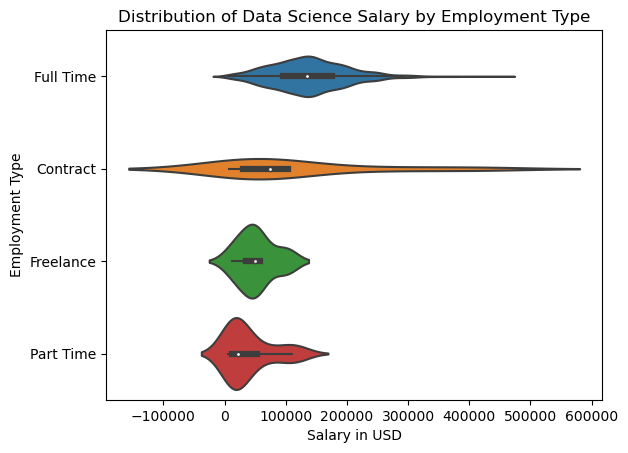

In [80]:

sns.violinplot(x='salary_in_usd', y='employment_type', data=df)

plt.title('Distribution of Data Science Salary by Employment Type')
plt.xlabel('Salary in USD')
plt.ylabel('Employment Type')
plt.yticks([0,1,2,3], ['Full Time', 'Contract', 'Freelance', 'Part Time'])

# Display the plot
plt.show()

The **swarm plot**, which plots a dot for ever observation, gives us a better sense how many more male than female passengers were aboard the Titanic.

C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\chelseam\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


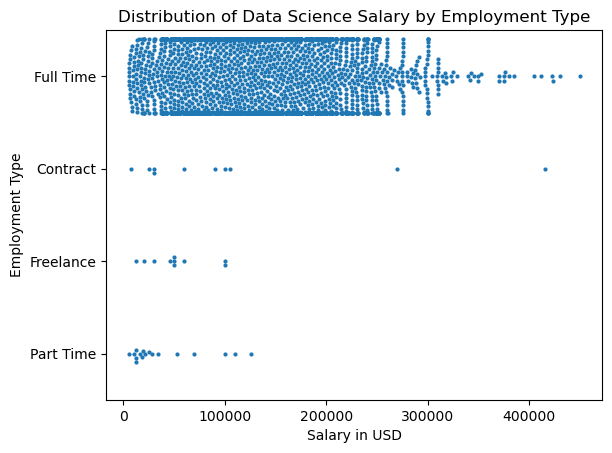

In [83]:
# Create a swarm plot - we have to reduce the size of the markers so we can visualize them all on the same graph
sns.swarmplot(x='salary_in_usd', y='employment_type', data=df, size=3)

plt.title('Distribution of Data Science Salary by Employment Type')
plt.xlabel('Salary in USD')
plt.ylabel('Employment Type')
plt.yticks([0,1,2,3], ['Full Time', 'Contract', 'Freelance', 'Part Time'])

# Show the plot
plt.show()

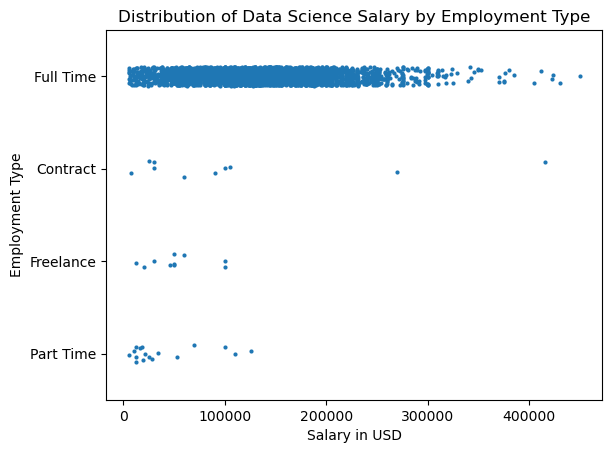

In [84]:
# Create a stripplot -like a swarmplot but slightly less fancy
sns.stripplot(x='salary_in_usd', y='employment_type', data=df, size=3)

plt.title('Distribution of Data Science Salary by Employment Type')
plt.xlabel('Salary in USD')
plt.ylabel('Employment Type')
plt.yticks([0,1,2,3], ['Full Time', 'Contract', 'Freelance', 'Part Time'])

# Show the plot
plt.show()

## Dendrograms

A **dendrogram** is a tree‑like diagram that visualizes the process and results of **hierarchical clustering**. Here’s how it works, using the Titanic dataset as an example:

1. **Compute pairwise distances**

   * First, you select the variables you care about (e.g., passenger class, age, fare, survival status) and compute a “distance” or dissimilarity between every pair of passengers.
   * Passengers who are similar (say, both are children in 3rd class) have a small distance; very different passengers (an elderly 1st‑class survivor vs. a young 3rd‑class non‑survivor) have a large distance.

2. **Iteratively merge clusters**

   * Initially, each passenger is its own cluster.
   * At each step, you merge the two clusters that are closest together.
   * For example, the two children in 3rd class might be the first to join; later, that small child cluster might merge with other 3rd‑class clusters, and so on.

3. **Record merge heights**

   * Each time two clusters merge, you record the distance (or dissimilarity) at which the merge happened.
   * In the Titanic example, a merge at low height might reflect very similar fare and age; a merge at high height might join a wealthy 1st‑class adult group with a low‑fare group.

4. **Draw the tree**

   * On the horizontal axis, you list all individual passengers (or cluster labels).
   * On the vertical axis, you plot the “height” at which each merge occurred.
   * Lines (branches) connect merged clusters, with the vertical position indicating the dissimilarity threshold.

5. **Interpret clusters**

   * By “cutting” the dendrogram at a chosen height, you decide how many clusters to keep.
   * For instance, cutting near the bottom might separate survivors vs. non‑survivors; cutting higher might split by class or age group.



Features used for clustering: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


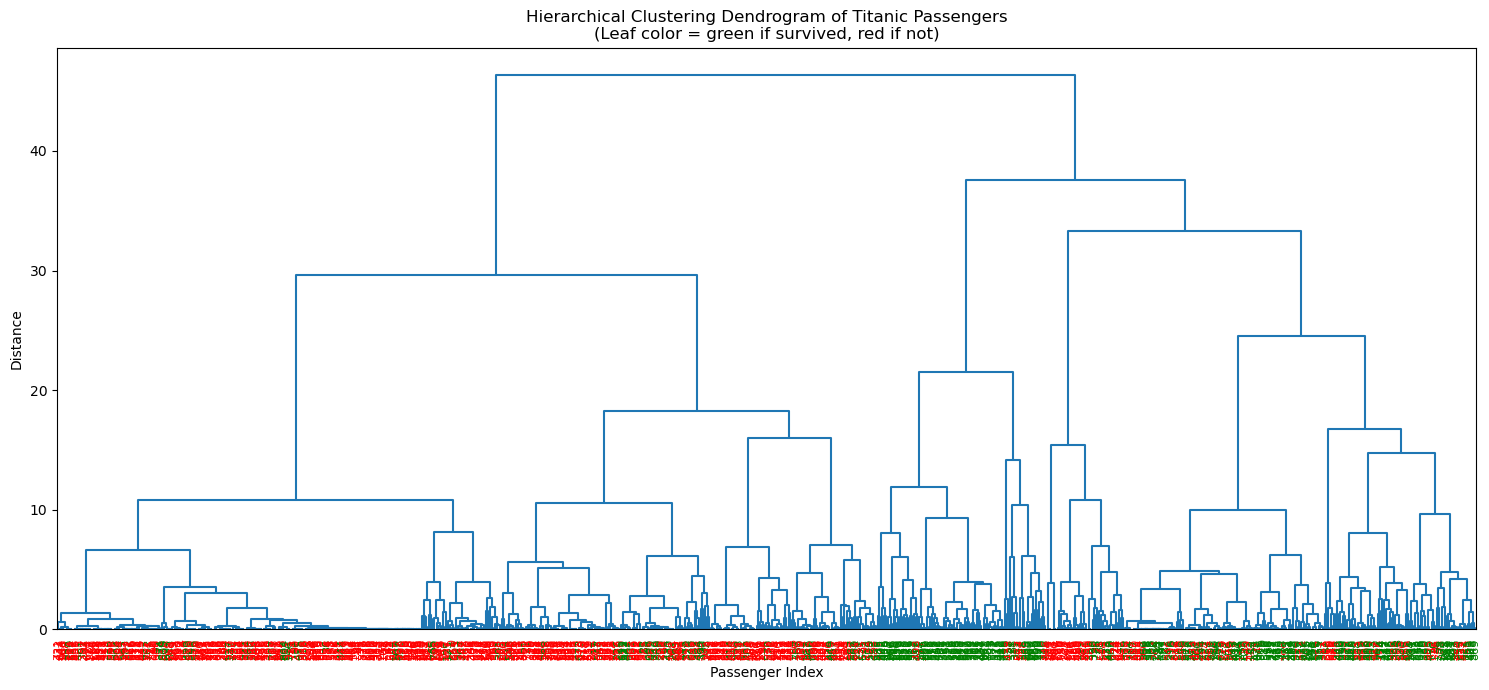

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


# 1. Load the dataset
df = pd.read_csv('assets/titanic_passengers.csv')

# 2. Preprocessing
#    – Map 'Sex' to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#    – Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3. Select features for clustering
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features].values
print("Features used for clustering:", features)

# 4. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Compute linkage matrix using Ward's method
linkage_matrix = sch.linkage(X_scaled, method='ward')

# 6. Plot the dendrogram
plt.figure(figsize=(15, 7))
dendro = sch.dendrogram(
    linkage_matrix,
    labels=df.index.astype(str).tolist(),
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=0  # disable automatic coloring
)

# 7. Color the labels based on Survival
ax = plt.gca()
for lbl in ax.get_xmajorticklabels():
    idx = int(lbl.get_text())
    lbl.set_color('green' if df.loc[idx, 'Survived'] == 1 else 'red')

plt.title('Hierarchical Clustering Dendrogram of Titanic Passengers\n'
          '(Leaf color = green if survived, red if not)')
plt.xlabel('Passenger Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

### We can learn things about the clusters by calculating the mean values of the characteristics of the individuals in the cluster. 

For instance, if we look at the two main clusters:

In [15]:
from scipy.cluster.hierarchy import fcluster


n_clusters = 2
cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# add to your DataFrame
df['cluster'] = cluster_labels

# compute the centroid (mean) of each cluster
cluster_centroids = df.groupby('cluster')[features].mean()
print(cluster_centroids)


           Pclass       Sex        Age     SibSp     Parch       Fare
cluster                                                              
1        2.380583  0.000000  32.138835  0.213592  0.077670  19.971802
2        2.210106  0.835106  25.557633  0.946809  0.797872  48.958700


Three clusters

In [16]:
from scipy.cluster.hierarchy import fcluster


n_clusters = 3
cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# add to your DataFrame
df['cluster'] = cluster_labels

# compute the centroid (mean) of each cluster
cluster_centroids = df.groupby('cluster')[features].mean()
print(cluster_centroids)

           Pclass       Sex        Age     SibSp     Parch        Fare
cluster                                                               
1        2.380583  0.000000  32.138835  0.213592  0.077670   19.971802
2        1.000000  0.886792  32.904906  0.547170  0.575472  121.689623
3        2.685185  0.814815  22.673148  1.103704  0.885185   20.405079


Five clusters

In [17]:
from scipy.cluster.hierarchy import fcluster


n_clusters = 5
cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

# add to your DataFrame
df['cluster'] = cluster_labels

# compute the centroid (mean) of each cluster
cluster_centroids = df.groupby('cluster')[features].mean()
print(cluster_centroids)

           Pclass       Sex        Age     SibSp     Parch        Fare
cluster                                                               
1        2.971326  0.000000  26.492832  0.200717  0.078853   11.048667
2        1.682203  0.000000  38.813559  0.228814  0.076271   30.520762
3        1.000000  0.886792  32.904906  0.547170  0.575472  121.689623
4        2.979592  0.530612  13.091837  4.142857  1.469388   35.726531
5        2.619910  0.877828  24.797511  0.429864  0.755656   17.008015


## OK
In this lesson, we learned how to compare distributions between groups.  Starting next week, we'll look at modeling relationships between two quantitative features.